In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import seaborn as sns
sns.set(font_scale = 2)

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)

data = pd.read_csv('../data/raw/train_features.csv')
salary_data = pd.read_csv('../data/raw/train_salaries.csv')

In [2]:
data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [4]:
salary_data.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


## Data Processing

In [6]:
# check uniqueness of job_id in three tables
print('email_table.csv:\t', len(data['jobId'].unique()))
print('email_opened_table.csv:\t', len(salary_data['jobId'].unique()))

email_table.csv:	 1000000
email_opened_table.csv:	 1000000


In [7]:
# Join the two csvs on jobID
data = pd.merge(left=data, right=salary_data, how='left', on='jobId')

# Write to file
data.to_csv('../data/processed/train_features.csv', index = False)

data.head()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


## Exploratory Data Analysis

In [8]:
# Data Looks Ok
data.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [9]:
data.median()

yearsExperience         12.0
milesFromMetropolis     50.0
salary                 114.0
dtype: float64

In [10]:
# Check for missing values --> No missing values
data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [11]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

jobId                1000000	 ['JOB1362684407687', 'JOB1362684407688', 'JOB1362684407689', 'JOB1362684407690', 'JOB1362684407691']
companyId               63	 ['COMP0', 'COMP1', 'COMP10', 'COMP11', 'COMP12']
jobType                  8	 ['CEO', 'CFO', 'CTO', 'JANITOR', 'JUNIOR']
degree                   5	 ['BACHELORS', 'DOCTORAL', 'HIGH_SCHOOL', 'MASTERS', 'NONE']
major                    9	 ['BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'COMPSCI', 'ENGINEERING']
industry                 7	 ['AUTO', 'EDUCATION', 'FINANCE', 'HEALTH', 'OIL']
yearsExperience         25	 [0, 1, 2, 3, 4]
milesFromMetropolis    100	 [0, 1, 2, 3, 4]
salary                 280	 [0, 17, 18, 19, 20]


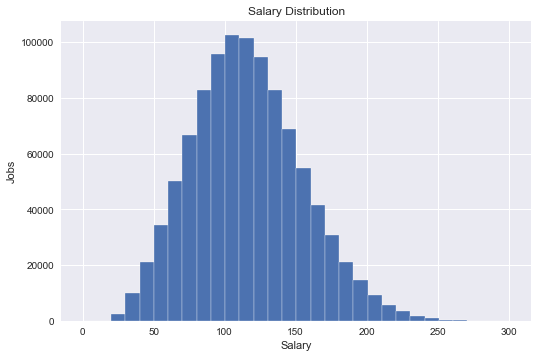

In [12]:
# Histogram of Salary
plt.style.use('seaborn')
plt.hist(data['salary'].dropna(), bins=30);
plt.xlabel('Salary'); plt.ylabel('Jobs'); 
plt.title('Salary Distribution');

In [13]:
# Find all correlations and sort 
correlations_data = data.corr()['salary'].sort_values()

# Print the most negative correlations
print(correlations_data.head(10), '\n')


milesFromMetropolis   -0.297666
yearsExperience        0.375013
salary                 1.000000
Name: salary, dtype: float64 



In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


#### Observations

- This data has an almost perfectly symmetrical distribution, because the mean and the median are approximately similar. 
- The dataset does not contain any missing values of outliers.
- The mean salary is 116 and the median is 114. 
- There is a slight presence of a right tail. 

In [15]:
from scipy import stats

_, p = stats.normaltest(data['salary'])
print('Normal Test',format(p, '.3f'))
print(p <= 0.05)

# Check with Shapiro - Wilk test
from scipy.stats import shapiro

_, p = shapiro(data['salary'])
print('Shapiro Test', format( p, '.3f'))
print(p <= 0.05)

Normal Test 0.000
True
Shapiro Test 0.000
True


#### Observation

We use a statistical test to verify whether salary has a normal distribution or not. A p- value smaller than 0.05 means the null hypothesis is rejected. As such, a p-value of 0.05 or greater means that the distribution is a normal distribution. 

Salary, therefore, does not follow a normal distribution. 

A Shapiro-Wilk test is also used to confirm if the data has been drawn from a normal distribution or not. The results are similar to observations made using the D’Agostino’s K^2 Test. 

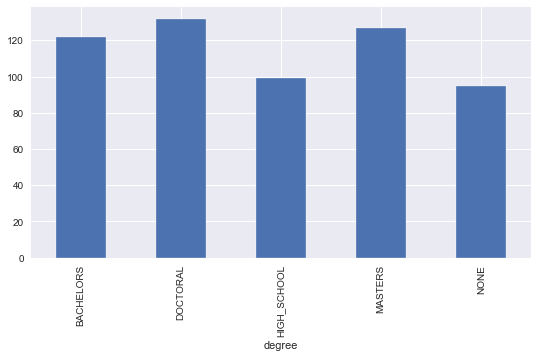

In [16]:
data.groupby(['degree'])['salary'].median().plot.bar()

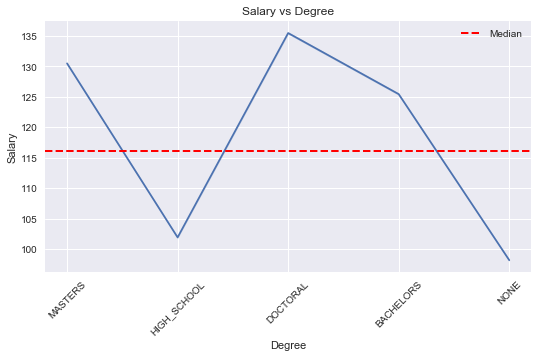

In [17]:
ax = sns.lineplot(x = 'degree', y = "salary", 
                  markers = True, dashes = False, data = data)
plt.axhline(data['salary'].mean(), color='red', linestyle='--', linewidth=2, label='Median')
plt.xticks(rotation = 45)
plt.title('Salary vs Degree')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.legend(loc='best')

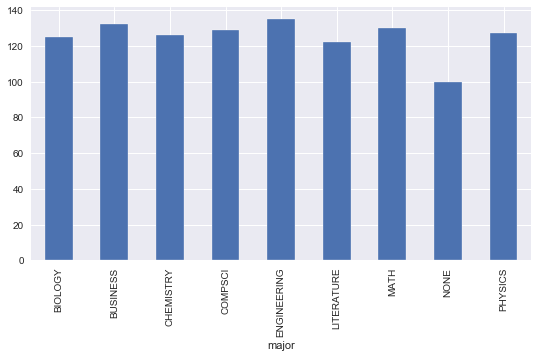

In [18]:
data.groupby(['major'])['salary'].median().plot.bar()

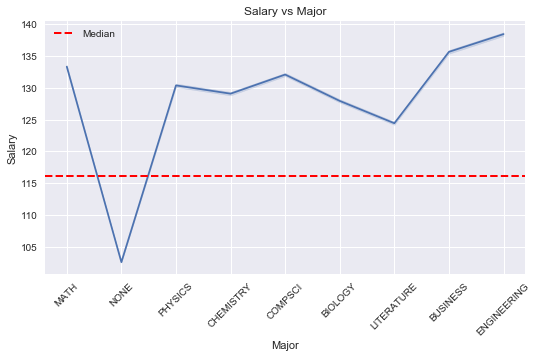

In [19]:
ax = sns.lineplot(x = 'major', y = "salary", 
                  markers = True, dashes = False, data = data)
plt.axhline(data['salary'].mean(), color='red', linestyle='--', linewidth=2, label='Median')
plt.xticks(rotation = 45)
plt.title('Salary vs Major')
plt.xlabel('Major')
plt.ylabel('Salary')
plt.legend(loc='best')

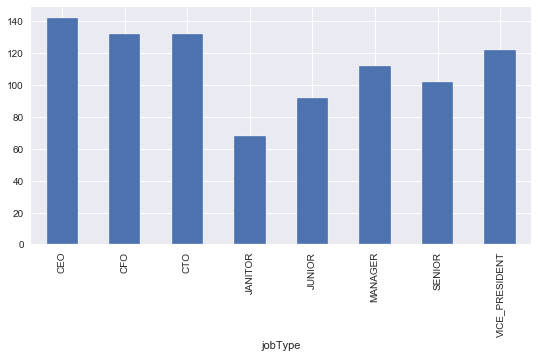

In [20]:
data.groupby(['jobType'])['salary'].median().plot.bar()

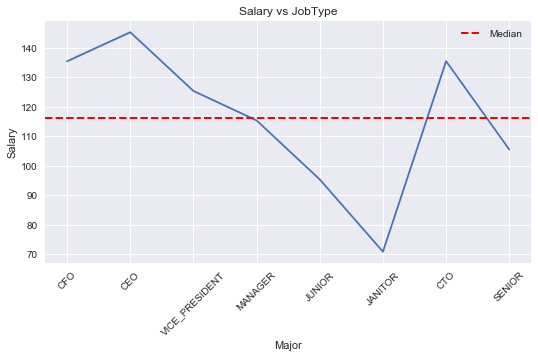

In [21]:
ax = sns.lineplot(x = 'jobType', y = "salary", 
                  markers = True, dashes = False, data = data)
plt.axhline(data['salary'].mean(), color='red', linestyle='--', linewidth=2, label='Median')
plt.xticks(rotation = 45)
plt.title('Salary vs JobType')
plt.xlabel('Major')
plt.ylabel('Salary')
plt.legend(loc='best')

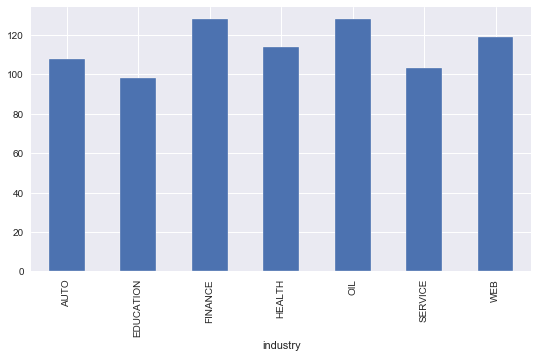

In [22]:
data.groupby(['industry'])['salary'].median().plot.bar()

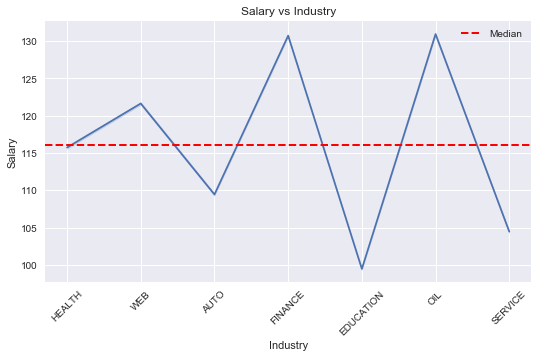

In [23]:
ax = sns.lineplot(x = 'industry', y = "salary", 
                  markers = True, dashes = False, data = data)
plt.axhline(data['salary'].mean(), color='red', linestyle='--', linewidth=2, label='Median')
plt.xticks(rotation = 45)
plt.title('Salary vs Industry')
plt.xlabel('Industry')
plt.ylabel('Salary')
plt.legend(loc='best')

#### Observations
Higher education is an influencer of how much one earns, with doctoral level attracting the most pay.

In addition to the level of education, the data reveals that the major an employee undertook has an effect on one's final pay. 

Unsurprisengly, being the CEO attracts the best pay, followed closely by CFOs. On the other end, janitors attract the least pay. 

Finance and Oil industries are the most financially rewarding industries to be in, while education is the least financially rewarding industry. 



In [24]:
# Make a copy of the data before transformation
raw_features = data.copy()

### Check for Correlations in both numeric and categorical columns

In [25]:
# Select the numeric columns
numeric_subset = data.select_dtypes('int64')

# Create columns with square root and log of numeric columns
# We do this to account for non-linear relationships, if any. 
for col in numeric_subset.columns:
    
    # Skip the salary column
    if col == 'salary':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns we are interested in
categorical_subset = data[['companyId', 'jobType', 'degree', 'major', 'industry']]

# One hot encode the categorical columns
categorical_subset = pd.get_dummies(categorical_subset, drop_first=True)

# Join the two dataframes (numerical and one hot encoded categorical columns) using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without a salary (sanity step)
features = features.dropna(subset = ['salary'])

# Find correlations with salary
correlations = features.corr()['salary'].dropna().sort_values()

In [26]:
# Display most negative correlations
print(correlations.head(10), '\n')

# Display most positive correlations
print(correlations.tail(10))

jobType_JANITOR            -0.441660
major_NONE                 -0.371421
milesFromMetropolis        -0.297666
sqrt_milesFromMetropolis   -0.290945
log_milesFromMetropolis    -0.265210
degree_NONE                -0.257349
degree_HIGH_SCHOOL         -0.203543
jobType_JUNIOR             -0.201993
industry_EDUCATION         -0.175148
industry_SERVICE           -0.122361
Name: salary, dtype: float64 

industry_FINANCE        0.154847
industry_OIL            0.156959
degree_MASTERS          0.171992
jobType_CFO             0.188804
jobType_CTO             0.189600
degree_DOCTORAL         0.231391
log_yearsExperience     0.333969
sqrt_yearsExperience    0.362920
yearsExperience         0.375013
salary                  1.000000
Name: salary, dtype: float64


In [27]:
correlations.shape

(94,)

#### Observations
- Being a janitor has the strongest negative correlation with salary, followed by have no major, distance a metropolis area and having no degree.
- On the other hand, years of experience has the strongest positive correlation with a higher salary, followed closely by being a ceo. 
- Interestingly, being a CTO has a stonger positive correlation with a higher salary, compared to being a CFO. 

### Feature Engineering and Feature Selection

In [28]:
# Remove highly correlated features
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Salary
    y = x['salary']
    x = x.drop(columns = ['salary'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    
    # Add the score back in to the data
    x['salary'] = y
               
    return x

In [29]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

sqrt_yearsExperience | yearsExperience | 0.97
log_yearsExperience | yearsExperience | 0.93
sqrt_milesFromMetropolis | milesFromMetropolis | 0.98
log_milesFromMetropolis | milesFromMetropolis | 0.9


In [30]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(1000000, 90)

In [31]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 90 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   yearsExperience         1000000 non-null  int64
 1   milesFromMetropolis     1000000 non-null  int64
 2   companyId_COMP1         1000000 non-null  uint8
 3   companyId_COMP10        1000000 non-null  uint8
 4   companyId_COMP11        1000000 non-null  uint8
 5   companyId_COMP12        1000000 non-null  uint8
 6   companyId_COMP13        1000000 non-null  uint8
 7   companyId_COMP14        1000000 non-null  uint8
 8   companyId_COMP15        1000000 non-null  uint8
 9   companyId_COMP16        1000000 non-null  uint8
 10  companyId_COMP17        1000000 non-null  uint8
 11  companyId_COMP18        1000000 non-null  uint8
 12  companyId_COMP19        1000000 non-null  uint8
 13  companyId_COMP2         1000000 non-null  uint8
 14  companyId_COMP20        1000000 non

### Machine Learning

In [32]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

#Imputing missing values and scaling values
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

#ML
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#Metrics 
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

#Hyperparameter tuning
import optuna 

import math
import time

# This is nice handy constant to turn on and off the GPU. When `False`
# the notebook will ignore the GPU even when present.
GPU_ENABLED = True

#### With Encoded Features

In [33]:
# Seperate features and targets - Contains encoded features
encoded_features = features.drop(columns='salary')
encoded_targets = pd.DataFrame(features['salary'])

# Split into 0.66% training and 0.33 validation set
encoded_X, encoded_X_val, encoded_y, encoded_y_val = train_test_split(encoded_features, 
                                      encoded_targets, 
                                      test_size = 0.33, 
                                      random_state = 1)

print(encoded_X.shape)
print(encoded_X_val.shape)
print(encoded_y.shape)
print(encoded_y_val.shape)

(670000, 89)
(330000, 89)
(670000, 1)
(330000, 1)


In [34]:
# Create a Baseline
#Metric: Root Mean Squared Error

# Function to calculate root mean squared error. 
# This function calculates root mean squared errors between true values and predictions

def rmse(y_true, y_pred):
    mse = np.square(np.subtract(y_true,y_pred)).mean()
    rmse = math.sqrt(abs(mse))
    return rmse

baseline = np.median(encoded_y)


print('The baseline guess is a score of %0.2f' % baseline)
print("Baseline Performance on the test set: RMSE = %0.2f" % rmse(encoded_y_val, baseline))

The baseline guess is a score of 114.00
Baseline Performance on the test set: RMSE = 38.78


In [35]:
print('\n', 'Checking all data is finite')
print('-' * 30)

#Making sure all values are finite
print (np.where(~np.isfinite(encoded_X)))
print (np.where(~np.isfinite(encoded_X_val)))


 Checking all data is finite
------------------------------
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [36]:
#Training, testing and evaluating a model
def train_test_evaluate(model):
    start = time.time()
    
    #Train   
    
    # # Normalizing the features so that different units do not affect the algorithms. 
    # While this process is not necessary for tree-based models, nevertheless, it is a good practice
    model = TransformedTargetRegressor(regressor= model,
                                        transformer = MinMaxScaler()
                                        ).fit(encoded_X,encoded_y)
    
    
    #Test
    # Inverse transformation happens at this step
    model_pred = model.predict(encoded_X_val)
        
    #Evaluate
    model_rmse = rmse(encoded_y_val, model_pred)
    
    
    end = time.time()
    time_taken = end - start
    
    print('Time taken: %0.2f' %time_taken, 's.')
    
    #Return performance metric
    return model_rmse

#### Algorithms

Running them in their default state

In [37]:
# #Random Forest
random_forest = RandomForestRegressor(random_state = 1,oob_score=True)
random_forest_rmse = train_test_evaluate(random_forest)
print ('Random Forest Root Mean Squared Error: %0.4f' %random_forest_rmse, '\n')


# # #Gradient Boosted Machines
gradient_boosted = GradientBoostingRegressor(random_state = 1)
gradient_boosted_rmse = train_test_evaluate(gradient_boosted)
print ('Gradient Boosted Regression Root Mean Squared Error: %0.4f' %gradient_boosted_rmse, '\n')

# Light Gradient Boosted Machines
lgbm_boosted = LGBMRegressor(random_state = 1)
lgbm_boosted_rmse = train_test_evaluate(lgbm_boosted)
print ('LGBM Boosted Regression Root Mean Squared Error: %0.4f' %lgbm_boosted_rmse, '\n')

# XGBoost
xgb_boosted = XGBRegressor(random_state = 1)
xgb_boosted_rmse = train_test_evaluate(xgb_boosted)
print ('XGB Boosted Regression Root Mean Squared Error: %0.4f' %xgb_boosted_rmse, '\n')

cat_boosted = CatBoostRegressor(random_state = 1, 
                                verbose=False,
                                task_type='CPU')
cat_boosted_rmse = train_test_evaluate(cat_boosted)
print ('Cat Boosted Regression Root Mean Squared Error: %0.4f' %cat_boosted_rmse, '\n')

#Linear Regression
lr = LinearRegression()
lr_rmse = train_test_evaluate(lr)
print ('Linear Regression Root Mean Squared Error: %0.4f' %lr_rmse, '\n')

# #Support Vector Machines
# svm = SVR(C = 1000, gamma = 0.1)
# svm_rmse = train_test_evaluate(svm)
# print ('SVM Root Root Mean Squared Error: %0.4f' %svm_rmse, '\n')

# #K-Nearest Neighbours                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
# knn = KNeighborsRegressor(n_neighbors = 10)
# knn_rmse = train_test_evaluate(knn)
# print ('K Nearest Neighbors Root Mean Squared Error: %0.4f' %knn_rmse)

In [ ]:
# Seperate features and targets - Categorical features not encoded
non_encoded_features = raw_features.drop(columns=['salary', 'jobId'])
non_encoded_targets = pd.DataFrame(raw_features['salary'])

# Split into 0.66% training and 0.33 validation set
non_encoded_X, non_encoded_X_val, non_encoded_y, non_encoded_y_val = train_test_split(non_encoded_features, 
                                      non_encoded_targets, 
                                      test_size = 0.33, 
                                      random_state = 1)

print(non_encoded_X.shape)
print(non_encoded_X_val.shape)
print(non_encoded_y.shape)
print(non_encoded_y_val.shape)

(670000, 7)
(330000, 7)
(670000, 1)
(330000, 1)


In [ ]:
# CatBoosted with Cat features
c_cat_boosted = CatBoostRegressor(loss_function='RMSE', 
                       random_state=1,
                       verbose=False,
                       task_type='CPU')

pool_train = Pool(non_encoded_X, 
                  non_encoded_y, 
                  cat_features = ['industry', 'companyId', 'jobType', 'degree', 'major'])

pool_val = Pool(non_encoded_X_val, 
                cat_features = ['industry', 'companyId', 'jobType', 'degree', 'major'])

# eval_dataset = Pool(non_encoded_X_val, non_encoded_y_val)

start = time.time()
c_cat_boosted.fit(pool_train, 
                  eval_set=(non_encoded_X_val, non_encoded_y_val), 
                  early_stopping_rounds=791, plot=True)

model_pred = c_cat_boosted.predict(pool_val)

# Reshape preds so that eval works
model_pred = model_pred.reshape(330000,1)

# #Evaluate
cat_cat_boosted_rmse = rmse(non_encoded_y_val, model_pred)

end = time.time()

time_taken = end - start

print('Best iteration: ', c_cat_boosted.get_best_iteration())
print('Time taken: %0.2f' %time_taken, 's.')
print ('Cat Boosted Regression Root Mean Squared Error: %0.4f' %cat_cat_boosted_rmse, '\n')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Best iteration:  791
Time taken: 280.97 s.
Cat Boosted Regression Root Mean Squared Error: 18.8306 



In [ ]:
# LightBoosted with Cat Features
c_lgbm_boosted = LGBMRegressor(boosting_type='gbdt', 
                             random_state = 1)

for col in non_encoded_X.select_dtypes(include=['object']):
    non_encoded_X[col] = non_encoded_X[col].astype('category')
    
for col in non_encoded_X_val.select_dtypes(include=['object']):
    non_encoded_X_val[col] = non_encoded_X[col].astype('category')

start = time.time() 
   
c_lgbm_boosted.fit(non_encoded_X, non_encoded_y)
model_pred = c_lgbm_boosted.predict(non_encoded_X_val)

# Reshape preds so that eval works
model_pred = model_pred.reshape(330000,1)

#Evaluate
cat_lgbm_boosted_rmse = rmse(non_encoded_y_val, model_pred)
    
end = time.time()
time_taken = end - start

print('Time taken: %0.2f' %time_taken, 's.')
print ('LGBM Boosted Regression Root Mean Squared Error: %0.4f' %cat_lgbm_boosted_rmse, '\n')



Time taken: 2.57 s.
LGBM Boosted Regression Root Mean Squared Error: 36.6132 



Text(0.5, 1.0, 'Model Comparison on Test RMSE')

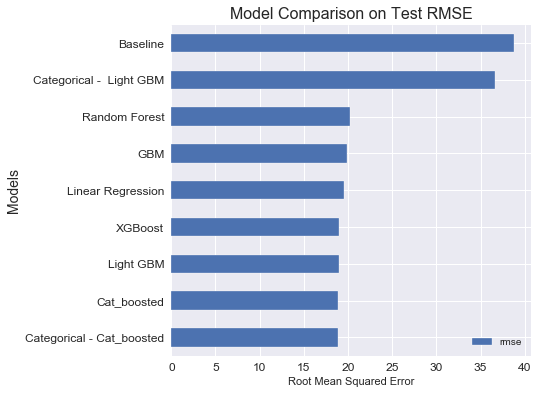

In [ ]:
baseline_rmse = rmse(encoded_y_val, baseline)

plt.style.use('seaborn')
figsize(8, 6)

#A dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Random Forest', 
                                           'GBM', 
                                           'Light GBM', 
                                           'Categorical -  Light GBM',
                                           'XGBoost', 
                                           'Cat_boosted', 
                                           'Categorical - Cat_boosted',
                                           'Linear Regression', 
                                           'Baseline'],
                                 
                                'rmse': [random_forest_rmse, 
                                         gradient_boosted_rmse, 
                                         lgbm_boosted_rmse, 
                                         cat_lgbm_boosted_rmse,
                                         xgb_boosted_rmse, 
                                         cat_boosted_rmse,
                                         cat_cat_boosted_rmse,                                         
                                         lr_rmse, baseline_rmse]})

#Horizontal bar chart of MAE
model_comparison.sort_values('rmse', ascending = True).plot(x = 'model', 
                                                           y = 'rmse', 
                                                           kind = 'barh')

#Plot formatting
plt.ylabel('Models', size = 14) 
plt.yticks(size = 12)
plt.xlabel('Root Mean Squared Error')
plt.xticks(size = 12)
plt.title('Model Comparison on Test RMSE', size = 16)

#### Observations

- Transformed dataset (categorical features are one hot encoded) is fitted to 6 out of 8 models. 
- 2 models (SVR and KNN) were interrupted due to long run-times (> 6 hours).
- Original dataset (including the categorical features) was directly fitted to 2 models (Cat Boosted and Light GBM).
- The run time for all but random forest models is decent, taking an average of 3 minutes to complete. Random forest took approximately 19 minutes. 
- All the tested models beat the baseline RMSE.
- Interestingly, linear regression performed better than light gbm on categorical features, random forest and gbm. 
- CatBoost model both with the original dataset and the transformed dataset has the least RMSE. 
- The models were used in their default settings. 


- **Next step**: Finetuning Categorical CatBoost.

### Finetuning CatBoost 

In [ ]:
# Current params
c_cat_boosted.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBord

In [ ]:
# Reload data 
# Seperate features and targets - Categorical features not encoded
non_encoded_features = raw_features.drop(columns=['salary', 'jobId'])
non_encoded_targets = pd.DataFrame(raw_features['salary'])

# Split into 0.66% training and 0.33 validation set
non_encoded_X, non_encoded_X_val, non_encoded_y, non_encoded_y_val = train_test_split(non_encoded_features, 
                                      non_encoded_targets, 
                                      test_size = 0.33, 
                                      random_state = 1)

print(non_encoded_X.shape)
print(non_encoded_X_val.shape)
print(non_encoded_y.shape)
print(non_encoded_y_val.shape)

(670000, 7)
(330000, 7)
(670000, 1)
(330000, 1)


In [ ]:
def finetuned_catboosted(X, y, X_test, y_test, model):
    ''' 
        Driver function for categorical model fit, predict and eval 
    '''
    # CatBoosted with Cat features
    pool_train = Pool(X, y, 
                    cat_features = ['companyId', 'jobType', 'degree', 'major', 'industry'])

    pool_val = Pool(non_encoded_X_val, 
                    cat_features = ['companyId', 'jobType', 'degree', 'major', 'industry'])

    start = time.time()
    model.fit(pool_train, 
                    eval_set=(X_test, y_test), 
                    early_stopping_rounds=791) # plot=True

    model_pred = model.predict(pool_val)

    # Reshape preds so that eval works
    model_pred = model_pred.reshape(330000,1)

    # #Evaluate
    model_rmse = rmse(y_test, model_pred)

    end = time.time()

    time_taken = end - start

    print('Time taken: %0.2f' %time_taken, 's.')
    print ('Cat Boosted Regression Root Mean Squared Error: %0.4f' %model_rmse, '\n')
    
    return model_rmse

In [ ]:
def finetune_catboost(trial):
    '''
        Fine tune function to tune a `CatBoostRegressor` model.
    '''

    params = {
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'subsample': trial.suggest_uniform('subsample',0,1),
        # Amount of randomness to use for scoring splits when the tree structure is selected
        # Helps avoid overfitting.
        'random_strength': trial.suggest_uniform('random_strength',10,50),
        'depth': trial.suggest_int('depth',1, 15),
        # Min number of training samples in leaf
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
    }

    if GPU_ENABLED:
        params["task_type"] = "GPU"
        params["bootstrap_type"] = "Poisson"

    finetuned_c_cat_boosted = CatBoostRegressor(loss_function='RMSE', 
                       random_state=1,
                       verbose=False, 
                       **params,)
    
    return finetuned_catboosted(non_encoded_X, 
                                non_encoded_y, 
                                non_encoded_X_val, 
                                non_encoded_y_val, 
                                finetuned_c_cat_boosted)

In [ ]:
study_cat = optuna.create_study(direction="minimize")
study_cat.optimize(finetune_catboost, n_trials=100)
study_cat.best_params

[I 2022-06-05 21:34:36,674] A new study created in memory with name: no-name-e1b240ca-8908-4901-80f8-364877b455fa


In [ ]:
#Hyper-parameter Importance
optuna.visualization.plot_param_importances(study_cat)

In [ ]:
# Performance of Key Hyper-parameters
optuna.visualization.plot_slice(study_cat, params=['depth', 
                                                   'learning_rate', 
                                                   'min_data_in_leaf', 
                                                   'leaf_estimation_iterations', 'reg_lambda', 
                                                   'random_strength', 
                                                   'subsample'
                                                   ])